
#PyTorch Basics: Deep Learning & Data Analysis

**Over the next few weeks we will learn the basics of Deep Learning using pytorch**

Do the coding exercises below, add comments and markdown explanations, and upload the resulting notebook together with the collab corresponding to mini project 2.

This notebook covers:

1. Problem setup & data splits (train/val/test)  
2. PyTorch tensors, datasets, and dataloaders  
3. Models: linear regression, MLP for classification, CNN
4. Losses, regularization (L2/weight decay & dropout), and metrics  
5. Optimization: gradient descent w/ `torch.optim`   
6. Experiment tracking: random seeds, reproducibility, and plotting learning curves  

> This notebook uses only standard libraries available in Colab: `torch`, `numpy`, `matplotlib`, and the `sklearn` library for toy data.


In [5]:
#@title Imports & reproducibility helpers
import math, random, os, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Tuple, Dict, Any

try:
    from sklearn.datasets import make_moons, make_circles
    _HAS_SKLEARN = True
except Exception as e:
    print("scikit-learn not found; synthetic dataset generators will fall back to torch-only.")
    _HAS_SKLEARN = False

import matplotlib.pyplot as plt

def set_seed(seed: int = 123):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(7)
DEVICE


'cpu'

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

##-1) Tensors

Tensors in pytorch are very similar to numpy arrays

1. 🧩 How do we construct a tensor?

Say we want to construct the following tensor using torch functions:

```python
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

2. 🧩 What's the size of this tensor?


In [6]:
#@title Answer 1
my_tensor = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])

print(my_tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [7]:
#@title Answer 2
my_tensor.shape

torch.Size([3, 3])

In [8]:
#@title Pytorch has many useful functions for creating, indexing and operating with tensor
# Parameters
sequence = torch.arange(5)   # [0, 1, 2, 3, 4]
repeats = 3                  # number of times to repeat

# Construct the repeated tensor
x = sequence.repeat(repeats)

print(sequence), print(x)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


(None, None)

In [9]:
#@title 🧩 Print a tensor of size (5,3), where all the values have one fixed size
torch.full((5,3), -2.0)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])

###🧩 Construct* the following tensor:

```python
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

At some point in my code, I need to write an equation that uses 2 * pi.
I get an error allerting  me that my code returns a float where a tensor is expected. What is the type of

```python
type(2*torch.py)
```
and how do I turn into a tensor?


In [10]:
#@title 🧩 Use pytorch functions to generate this matrix

n = 4
A = torch.eye(n)                         # diagonal of 1s
A += torch.diag(torch.full((n-1,), -2.), diagonal=-1)  # sub-diagonal
A += torch.diag(torch.full((n-1,), -2.), diagonal=1)   # super-diagonal

print(A)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 0) Broadcasting, Indexing, and Distributions in PyTorch

**Goal:** Practice *broadcasting*, *masking*, and *distributions* in PyTorch through short guided exercises.

Run each code cell, fill in the `# TODO` parts, and test your answers.


In [11]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
torch.manual_seed(0)



## Broadcasting and Fancy Indexing

Broadcasting and indexing make PyTorch efficient and expressive.



### 🧩 Exercise 0.1  
Construct a tensor `X` where `X[i,j] = 2*i + j` using broadcasting.  

**Example Output:**
```
tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])
```


In [12]:

# TODO: Construct X using broadcasting
# i = torch.arange(...).view(-1, 1)
# j = torch.arange(...).view(1, -1)
# X = ...


### 🧩 Exercise 0.2  
Compute a **distance matrix** `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`.  

Use broadcasting (no loops).


In [13]:

X = torch.arange(12, dtype=float).reshape(6, 2)
# TODO: Compute pairwise distances using broadcasting
# D = ...



### 🧩 Exercise 0.3  
Extract the submatrix of rows `[1,4]` and columns `[0,2,3]` of  
`A = torch.arange(36).reshape(6, 6)`

**Expected Output:**
```
tensor([[ 6,  8,  9],
        [24, 26, 27]])
```


In [14]:

A = torch.arange(36).reshape(6, 6)
# TODO: Extract submatrix using indexing
# rows = torch.tensor([...])
# cols = torch.tensor([...])
# subA = ...



### 🧩 Exercise 0.4  
Create a **boolean mask** `M` where `M[i,j]` is True iff `A[i,j]` is divisible by 5 or 7.


In [15]:

A = torch.arange(36).reshape(6, 6)
# TODO: Create boolean mask
# M = ...
# print(M.sum())



### 🧩 Exercise 0.5  
Using the mask `M`, add 10 to elements of `A` that are divisible by 5 or 7 (in-place).


In [ ]:

# TODO: Update A in-place
# A[M] += 10
# print(A)



## Distributions

`torch.distributions` provides a clean API for probability distributions and supports broadcasting.



### 🧩 Exercise 0.6  
Draw **100 samples** from a Poisson distribution with rate λ = 4.5.


In [16]:

# TODO: Draw samples and plot histogram
# samples = dist.Poisson(4.5).sample((100,))
# plt.hist(samples.numpy(), bins=range(0,15))
# plt.show()



### 🧩 🧩 Exercise 0.7  
Construct a matrix `P` where  
`P[i,j] = exp(-λ[i]) * λ[i]^j / j!`  
for λ = `torch.arange(1.,6.)` and j = `torch.arange(5.)`.


In [17]:

lam = torch.arange(1.,6.).view(-1,1)
j = torch.arange(5.).view(1,-1)
# TODO: Compute P using broadcasting and torch.lgamma
# factorial = torch.exp(torch.lgamma(j+1))
# P = ...



### 🧩 🧩 Exercise 0.8
Evaluate the **log-probability** of `[0.5, 2.0, 5.0]`  
under a Gamma distribution with shape=3.0, rate=2.0.


In [18]:

# TODO: Evaluate log probability
# g = dist.Gamma(concentration=3.0, rate=2.0)
# logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))
# print(logp)



### 🧩 Problem 0.9  
Draw **1000 samples** from a mixture of two Poisson distributions  
with rates 2 and 7, equal weights (0.5, 0.5).  
Plot a normalized histogram.


In [19]:

# TODO: Draw samples from mixture
# z = torch.bernoulli(torch.full((1000,), 0.5))
# lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))
# samples = dist.Poisson(lam).sample()
# plt.hist(samples.numpy(), bins=range(0,20), density=True)
# plt.show()



## Normal Distributions



### 🧩 Problem 0.10  
Use `dist.Normal` to draw a batch of shape `(200, 3)` of independent standard normal random variables.


In [37]:

# TODO: Draw standard normal samples
# normals = dist.Normal(0, 1).sample((200,3))
# print(normals.shape)



### 🧩 Problem 0.11  
Use `dist.Normal` to draw a batch of shape `(4, 4)`  
with means given by `mu` and variance 1.0.


In [38]:

mu = torch.tensor([[ 0,  1,  2,  3],
                   [ 4,  5,  6,  7],
                   [ 8,  9, 10, 11],
                   [12, 13, 14, 15]], dtype=torch.float32)
# TODO: Draw samples
# samples = dist.Normal(mu, 1.0).sample()
# print(samples.shape)



---
### ✅ Notes / Extensions

- Vary λ and j shapes to visualize broadcasting.  
- Plot distance matrices `plt.imshow(D)` to see patterns.  
- Compare the Poisson mixture histogram with theoretical PMFs.  
- Explore `dist.MixtureSameFamily` for more complex mixtures.


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 1) Data: from arrays to `Dataset`/`DataLoader` + train/val/test split

**Key ideas**
- Always separate data into **train / validation / test** (e.g., 70/15/15).  
- Wrap arrays in a custom `Dataset` to keep the training loop clean.  
- Use a `DataLoader` for batching, shuffling, and parallel loading.

We'll start with toy 2D datasets for classification (moons and circles) and a simple 1D regression problem.


In [39]:

#@title Toy datasets (classification: moons/circles) + (regression: y = ax + b + noise)
def make_toy_classification(n_samples=1000, kind="moons", noise=0.2, seed=0):
    set_seed(seed)
    if _HAS_SKLEARN:
        if kind == "moons":
            X, y = make_moons(n_samples=n_samples, noise=noise)
        elif kind == "circles":
            X, y = make_circles(n_samples=n_samples, factor=0.4, noise=noise)
        else:
            raise ValueError("kind must be 'moons' or 'circles'")
        X = X.astype(np.float32); y = y.astype(np.int64)
    else:
        # Torch-only fallback: two Gaussian blobs
        c1 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([0.0, 0.0])
        c2 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([2.5, 2.5])
        X = torch.cat([c1, c2], dim=0).numpy().astype(np.float32)
        y = torch.cat([torch.zeros(len(c1)), torch.ones(len(c2))]).numpy().astype(np.int64)
    return X, y

def make_toy_regression(n_samples=600, a=2.0, b=-1.0, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 1)).astype(np.float32)
    y = (a * x + b + np.random.normal(0, noise_std, size=x.shape)).astype(np.float32)
    return x, y

class NumpyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def train_val_test_split(ds: Dataset, ratios=(0.7, 0.15, 0.15), seed=42):
    assert abs(sum(ratios) - 1.0) < 1e-6, "Ratios must sum to 1"
    n = len(ds)
    n_train = int(ratios[0] * n)
    n_val = int(ratios[1] * n)
    n_test = n - n_train - n_val
    set_seed(seed)
    return random_split(ds, [n_train, n_val, n_test])


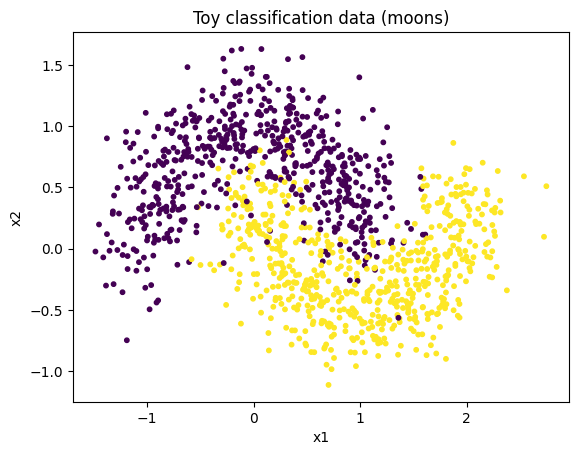

(840, 180, 180)

In [40]:

#@title Visualize a toy classification dataset
Xc, yc = make_toy_classification(n_samples=1200, kind="moons", noise=0.25, seed=1)
ds_cls = NumpyDataset(Xc, yc)
train_ds, val_ds, test_ds = train_val_test_split(ds_cls, (0.7, 0.15, 0.15), seed=1)

plt.figure()
plt.scatter(Xc[:,0], Xc[:,1], c=yc, s=10)
plt.title("Toy classification data (moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

len(train_ds), len(val_ds), len(test_ds)


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

## 2) Linear Regression in PyTorch (MSE loss)

We'll fit a line to noisy data: \( y \approx ax + b \).  
This section introduces:
- `nn.Module` for models
- Mean Squared Error (MSE) loss
- `optim.SGD` and `optim.Adam`


In [41]:
#@title Linear regression dataset & model
Xr, yr = make_toy_regression(n_samples=600, a=2.2, b=-0.7, noise_std=0.35, seed=2)
ds_reg = NumpyDataset(Xr, yr)

train_r, val_r, test_r = train_val_test_split(ds_reg, (0.7, 0.15, 0.15), seed=2)
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)  # weight_decay = L2


In [42]:
#@title Training & evaluation utilities
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


Epoch 050 | train: 0.1175 | val: 0.0840
Epoch 100 | train: 0.1170 | val: 0.0847
Epoch 150 | train: 0.1170 | val: 0.0847
Epoch 200 | train: 0.1170 | val: 0.0848


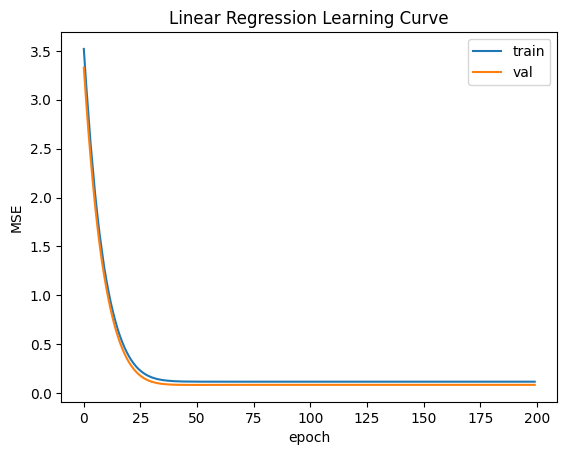

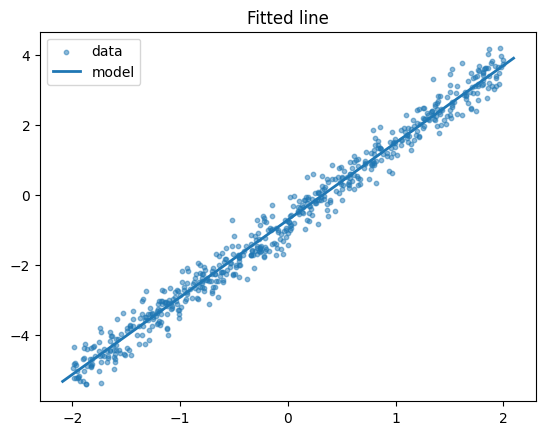

In [43]:

#@title Fit linear model & plot learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val = va; best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model.load_state_dict(best_state)

plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize fit
@torch.no_grad()
def predict(x):
    return model(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

xs = np.linspace(Xr.min()-0.1, Xr.max()+0.1, 200).reshape(-1,1).astype(np.float32)
ys = predict(xs)

plt.figure()
plt.scatter(Xr, yr, s=10, alpha=0.5, label="data")
plt.plot(xs, ys, linewidth=2, label="model")
plt.legend(); plt.title("Fitted line"); plt.show()


# Exercise A
Create a synthetic data where the regressor x is an (n,2) dimensional tensor
and the target y is a (n,4) dimensional tensor. Does the LinearRegressor model
``` python
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
```
work? Why or why not? How can you modify the class to make it work? Once you fit the model, visualize the result.

Answer：
The linear regressor model doesn’t work because nn.Linear(1, 1) only accepts inputs of shape (n, 1) and produces outputs of shape (n, 1). However, the task requires inputs of shape (n, 2) and outputs of shape (n, 4), so the dimensions don’t match.

In [44]:
import numpy as np
import torch
import torch.nn as nn

def generate_example_data(num=1000, A=None, B=None, noise_level=0.3, random_seed=0):
    np.random.seed(random_seed)
    features = np.random.uniform(low=-2.0, high=2.0, size=(num, 2)).astype(np.float32)
    eps = np.random.normal(loc=0.0, scale=noise_level, size=(num, 4)).astype(np.float32)
    targets = features.dot(A) + B + eps
    return features, targets


class ExampleLinearModel(nn.Module):
    def __init__(self):
        super(ExampleLinearModel, self).__init__()
        self.fc = nn.Linear(in_features=2, out_features=4)

    def forward(self, inputs):
        output = self.fc(inputs)
        return output


In [45]:
coef_mat = np.array(
    [[1.0,  2.0,  3.0,  4.0],
     [-1.0, -2.0, -3.0, -4.0]],
    dtype=np.float32
)

bias_vec = np.array([0.0, 0.5, 1.0, 1.5], dtype=np.float32)
data_x, data_y = generate_example_data(
    num=1000,
    A=coef_mat,
    B=bias_vec
)

example_dataset = NumpyDataset(data_x, data_y)

train_set, val_set, test_set = train_val_test_split(
    example_dataset,
    (0.7, 0.15, 0.15),
    seed=0
)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=128, shuffle=False)
test_loader  = DataLoader(test_set,  batch_size=128, shuffle=False)


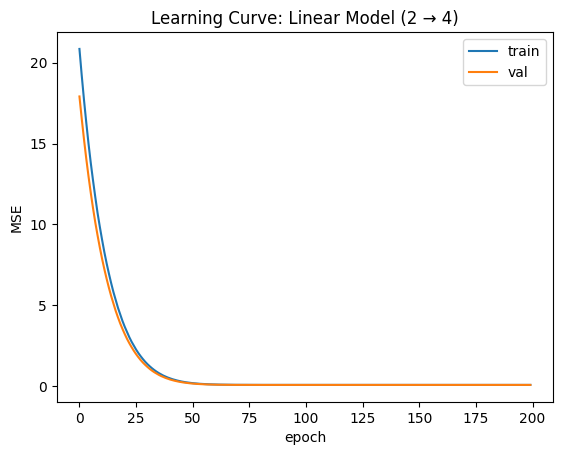

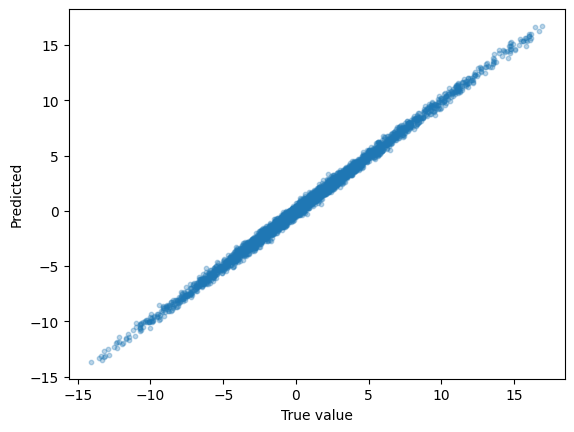

In [46]:
#same like example
model_ex = ExampleLinearModel().to(DEVICE)
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model_ex.parameters(), lr=1e-2, weight_decay=0.0)
train_log, val_log = [], []
num_epochs = 200
lowest_val = float("inf")
best_weights = None
for ep in range(1, num_epochs + 1):

    train_loss = train_epoch(model_ex, train_loader, loss_fn, optim)
    val_loss   = evaluate(model_ex, val_loader, loss_fn)

    train_log.append(train_loss)
    val_log.append(val_loss)
    if val_loss < lowest_val:
        lowest_val = val_loss
        best_weights = {k: v.detach().cpu().clone()
                        for k, v in model_ex.state_dict().items()}
model_ex.load_state_dict(best_weights)
plt.figure()
plt.plot(train_log, label="train")
plt.plot(val_log, label="val")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Learning Curve: Linear Model (2 → 4)")
plt.legend()
plt.show()
model_ex.eval()
with torch.no_grad():
    true_vals = data_y
pred_vals = model_ex(torch.from_numpy(data_x).to(DEVICE)).cpu().detach().numpy()

plt.scatter(true_vals.reshape(-1), pred_vals.reshape(-1), s=10, alpha=0.3)
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.show()


#Exercise B
The function train_val_test_split does the job, but it does not seem very elegant. Using  
``` python
    from torch.utils.data import random_split
```    
create a 60-20-20 split of your data and train a model using that.

In [53]:
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
def set_seed(seed: int = 0):
    np.random.seed(seed)
def sim_data_exa(n_samples=1000, a_array=None, b_array=None, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 2)).astype(np.float32)
    noise = np.random.normal(0, noise_std, size=(n_samples, 4)).astype(np.float32)
    y = x @ a_array + b_array + noise
    return x, y
    # define linear transformation for synthetic data
sim_a = np.asarray(
    [[ 1.0,  2.0,  3.0,  4.0],
     [-1.0, -2.0, -3.0, -4.0]],
    dtype=np.float32
)
sim_b = np.asarray([0.0, 0.5, 1.0, 1.5], dtype=np.float32)
sim_x, sim_y = sim_data_exa(
    n_samples=1000,
    a_array=sim_a,
    b_array=sim_b
)
sim_ds = NumpyDataset(sim_x, sim_y)
split_ratio = (0.6, 0.2, 0.2)
sim_gen = torch.Generator().manual_seed(123)

sim_train, sim_val, sim_test = random_split(
    sim_ds,
    split_ratio,
    generator=sim_gen
)
sim_train_loader = DataLoader(sim_train, batch_size=64,  shuffle=True)
sim_val_loader   = DataLoader(sim_val,   batch_size=128, shuffle=False)
sim_test_loader  = DataLoader(sim_test,  batch_size=128, shuffle=False)




In [54]:
import torch.nn as nn

class LinearRegressorExa(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 4)

    def forward(self, x):
        return self.linear(x)

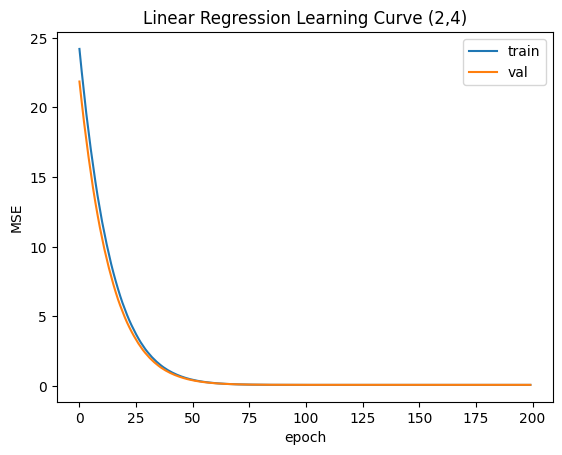

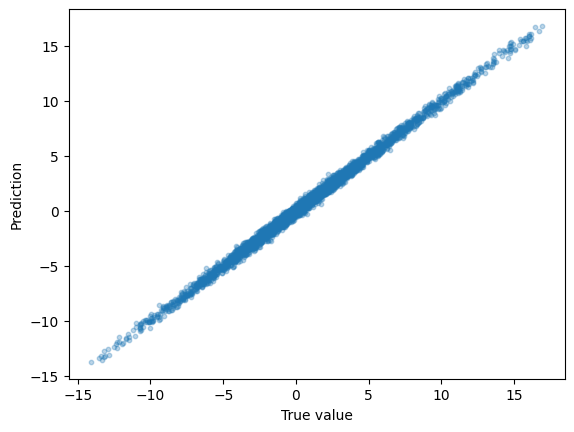

In [55]:
#train linear model on synthetic data
sim_model = LinearRegressorExa().to(DEVICE)
loss_fn   = nn.MSELoss()
optim     = torch.optim.Adam(sim_model.parameters(),
                             lr=1e-2,
                             weight_decay=0.0)

train_hist, val_hist = [], []
num_epochs = 200
best_val   = float("inf")
best_state = None

for ep in range(num_epochs):
    train_loss = train_epoch(sim_model, sim_train_loader, loss_fn, optim)
    val_loss   = evaluate(sim_model, sim_val_loader, loss_fn)

    train_hist.append(train_loss)
    val_hist.append(val_loss)
    if val_loss < best_val:
        best_val = val_loss
        best_state = {k: v.detach().cpu().clone()
                      for k, v in sim_model.state_dict().items()}
sim_model.load_state_dict(best_state)
plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve (2,4)")
plt.legend()
plt.show()
sim_model.eval()
with torch.inference_mode():
    x_tensor   = torch.from_numpy(sim_x).to(DEVICE)
    sim_y_pred = sim_model(x_tensor).cpu().numpy()
    sim_y_true = sim_y

plt.figure()
plt.scatter(sim_y_true.reshape(-1), sim_y_pred.reshape(-1), s=10, alpha=0.3)
plt.xlabel("True value")
plt.ylabel("Prediction")
plt.show()

## Exercise C
### Write your own Mean Squared Error

PyTorch provides a built-in criterion:

```python
criterion = nn.MSELoss()

But it’s important to understand what happens under the hood.
Let’s implement our own version — call it nn.MeanSquaredOops — that behaves like nn.MSELoss. It should work as a callable class:

```python
criterion = MeanSquaredOops()
loss = criterion(y_pred, y_true)


```python
# YOUR WORK: Implement MeanSquaredOops to mimic nn.MSELoss

import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())

```

Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

In [57]:
# SquareErrorFun

class SquareErrorFun(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, pred, target):
        diff = pred - target
        se = diff * diff
        return torch.mean(se)
loss_ref = nn.MSELoss()
my_loss = SquareErrorFun()

pred = torch.tensor([2.5, 0.0, 2.1])
target = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", loss_ref(pred, target).item())
print("Custom SquareErrorFun:", my_loss(pred, target).item())


PyTorch MSELoss: 0.17000000178813934
Custom SquareErrorFun: 0.17000000178813934


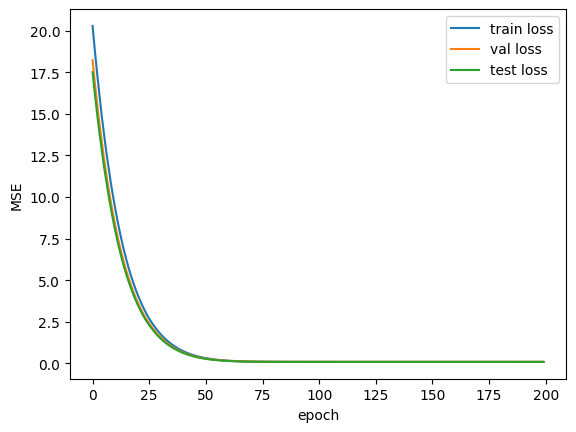

In [58]:
# visualize loss curves for train / val / test

sim_model = LinearRegressorExa().to(DEVICE)
loss_fn   = nn.MSELoss()
optim     = torch.optim.Adam(sim_model.parameters(), lr=1e-2, weight_decay=0.0)

train_log, val_log, test_log = [], [], []
num_epochs   = 200
best_val_loss = float("inf")
best_params   = None

for ep in range(1, num_epochs + 1):
    tr_loss = train_epoch(sim_model, sim_train_loader, loss_fn, optim)
    va_loss = evaluate(sim_model, sim_val_loader,  loss_fn)
    te_loss = evaluate(sim_model, sim_test_loader, loss_fn)

    train_log.append(tr_loss)
    val_log.append(va_loss)
    test_log.append(te_loss)

    if va_loss < best_val_loss:
        best_val_loss = va_loss
        best_params = {k: v.cpu().clone() for k, v in sim_model.state_dict().items()}
sim_model.load_state_dict(best_params)

def plot_all_losses(tr, va, te):
    plt.figure()
    plt.plot(tr, label="train loss")
    plt.plot(va, label="val loss")
    plt.plot(te, label="test loss")
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

plot_all_losses(train_log, val_log, test_log)

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 3) Classification with an MLP (Cross-Entropy loss)

- Two-layer MLP with ReLU and Dropout  
- Cross-entropy loss for a 2-class problem  
- Accuracy metric  
- Optional L2 (weight decay) for regularization  
- Optional learning-rate scheduler


In [ ]:

#@title Dataloaders for classification
batch_size = 64
train_loader_c = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader_c   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader_c  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [86]:

#@title MLP model, loss, optimizer, scheduler
class MLP(nn.Module):
    def __init__(self, in_dim=2, hidden=64, p_dropout=0.2, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(p_dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_classes)
        )
    def forward(self, x):
        return self.net(x)

mlp = MLP().to(DEVICE)
ce = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)


## Exercise D
Write using markdown + LaTex what the MLP above is implementing. Explain what ReLU, Dropout, Linear are. Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.


### MLP structure and components

The **MLP (Multi-Layer Perceptron)** class inherits from `nn.Module`. It defines a sequence of layers where the features of the input data are learned. It also adds some useful components such as:

- non-linearity (via activation functions),
- overfitting prevention (via dropout),

and finally maps the input data to the desired number of classes (here `n_classes = 2`).

---

### `nn.Linear`

`nn.Linear` learns features from the input data by applying a weight matrix and a bias vector.  
Given an input tensor \( x \), the computation is:

\[
\text{output} = x W^\top + b
\]

where:

- \( x \) is the input,
- \( W \) is the weight matrix,
- \( b \) is the bias vector.

---

### `nn.ReLU`

`nn.ReLU` prevents a sequence of linear transformations from collapsing into a single linear mapping.  
In other words, it introduces non-linearity so that the MLP can model non-linear features.

\[
\text{ReLU}(x) = \max(0, x)
\]

Without ReLU (or any non-linear activation), the whole MLP would still be equivalent to one linear layer.

---

### `nn.Dropout`

`nn.Dropout` helps prevent overfitting. During training, it randomly sets some elements of the input to zero with probability \( p \).  
This forces the model to not rely too much on a small number of specific features.

\[
\text{Dropout}(x_i) =
\begin{cases}
\frac{x_i}{1 - p}, & \text{with probability } (1 - p) \\
0,                 & \text{with probability } p
\end{cases}
\]

The scaling by \( \frac{1}{1-p} \) keeps the expected activation magnitude the same.

---

### Dimension flow in `forward(x)`

Assume the batch size is 64 and the input has 2 features:

- Input:  
  \[
  x \in \mathbb{R}^{64 \times 2}
  \]

- After `nn.Linear(2, 64)`:  
  \[
  \text{shape} = 64 \times 64
  \]

- After `nn.ReLU`:  
  \[
  \text{shape} = 64 \times 64
  \]

- Before `nn.Dropout`:  
  \[
  \text{shape} = 64 \times 64
  \]

After `nn.Dropout`, the **shape remains** \(64 \times 64\); only some elements are set to zero.


In [87]:

#@title Train loop with accuracy
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n


## Exercise E
Write the code above in as few lines of code as possible. What torch functions can you use?

In [59]:
#### unified train/eval function

def run_epoch(model, loader, loss_fn, optimizer=None):
    is_training = optimizer is not None
    model.train(is_training)

    total_loss, total_correct, total_samples = 0.0, 0, 0

    # torch.set_grad_enabled handles both train & eval modes
    with torch.set_grad_enabled(is_training):
        for xb, yb in loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)

            if is_training:
                optimizer.zero_grad()

            outputs = model(xb)
            loss = loss_fn(outputs, yb)

            if is_training:
                loss.backward()
                optimizer.step()

            # accumulate
            batch_size = xb.size(0)
            total_samples += batch_size
            total_loss += loss.item() * batch_size
            total_correct += (outputs.argmax(dim=1) == yb).sum().item()

    return total_loss / total_samples, total_correct / total_samples

Epoch 050  loss: 0.143/0.117  acc: 0.950/0.939
Epoch 100  loss: 0.134/0.119  acc: 0.951/0.956
Epoch 150  loss: 0.133/0.113  acc: 0.950/0.939
Epoch 200  loss: 0.137/0.112  acc: 0.951/0.939
Epoch 250  loss: 0.130/0.111  acc: 0.951/0.939
Epoch 300  loss: 0.126/0.111  acc: 0.957/0.944


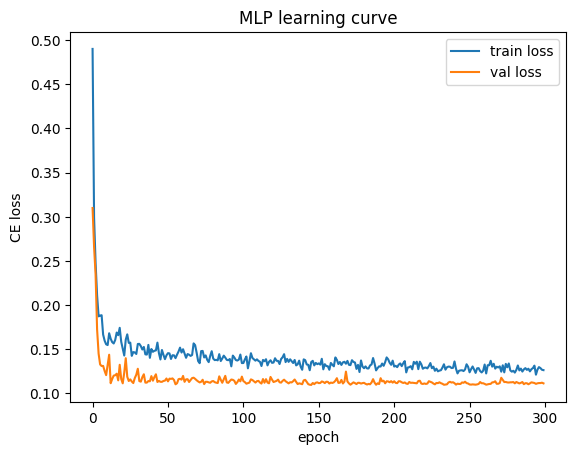

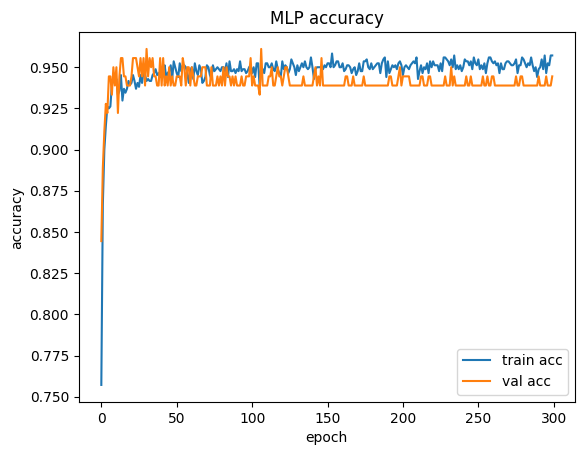

In [ ]:

#@title Fit MLP
best_val = 1e9; best_state = None
hist = {"tr_loss":[], "tr_acc":[], "va_loss":[], "va_acc":[]}
epochs = 300

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(mlp, train_loader_c, ce, opt)
    va_loss, va_acc = evaluate_cls(mlp, val_loader_c, ce)
    hist["tr_loss"].append(tr_loss); hist["tr_acc"].append(tr_acc)
    hist["va_loss"].append(va_loss); hist["va_acc"].append(va_acc)
    sched.step()
    if va_loss < best_val:
        best_val = va_loss
        best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d}  loss: {tr_loss:.3f}/{va_loss:.3f}  acc: {tr_acc:.3f}/{va_acc:.3f}")

mlp.load_state_dict(best_state)

plt.figure()
plt.plot(hist["tr_loss"], label="train loss")
plt.plot(hist["va_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("CE loss"); plt.legend(); plt.title("MLP learning curve"); plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train acc")
plt.plot(hist["va_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("MLP accuracy"); plt.show()


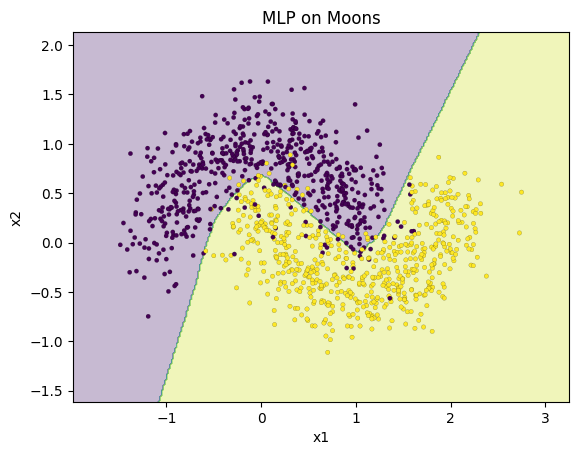

In [ ]:

#@title Decision boundary visualization
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu().numpy()
    Z = logits.argmax(axis=1).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

Xc_np, yc_np = Xc, yc
plot_decision_boundary(mlp, Xc_np, yc_np, title="MLP on Moons")


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 4) (Optional) Tiny CNN on synthetic images

We'll create small 16×16 grayscale images containing either a **dot** or a **ring** and train a mini-CNN.
This mirrors the idea of "coloring pixels" or simple shape detection and is fast to run on CPU.


In [64]:

#@title Synthetic image dataset (dot vs ring)
def make_dot(center, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    img[center] = 1.0
    return img

def make_ring(center, radius=3, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    cx, cy = center
    for x in range(size):
        for y in range(size):
            if abs(math.hypot(x-cx, y-cy) - radius) < 0.6:
                img[x, y] = 1.0
    return img

def make_image_dataset(n=2000, size=16, seed=0):
    set_seed(seed)
    X, y = [], []
    for i in range(n):
        cls = np.random.randint(0,2)  # 0=dot, 1=ring
        cx, cy = np.random.randint(4, size-4), np.random.randint(4, size-4)
        if cls == 0:
            img = make_dot((cx, cy), size)
        else:
            img = make_ring((cx, cy), radius=np.random.randint(2,4), size=size)
        # jitter + blur-like noise
        img += 0.05 * np.random.randn(size, size).astype(np.float32)
        img = np.clip(img, 0.0, 1.0)
        X.append(img[None, ...])  # channels=1
        y.append(cls)
    X = np.stack(X).astype(np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y

class ImageDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

Xi, yi = make_image_dataset(n=2500, size=16, seed=0)
ds_img = ImageDataset(Xi, yi)
tr_i, va_i, te_i = train_val_test_split(ds_img, (0.7, 0.15, 0.15), seed=3)
tr_li = DataLoader(tr_i, batch_size=128, shuffle=True)
va_li = DataLoader(va_i, batch_size=256, shuffle=False)
te_li = DataLoader(te_i, batch_size=256, shuffle=False)


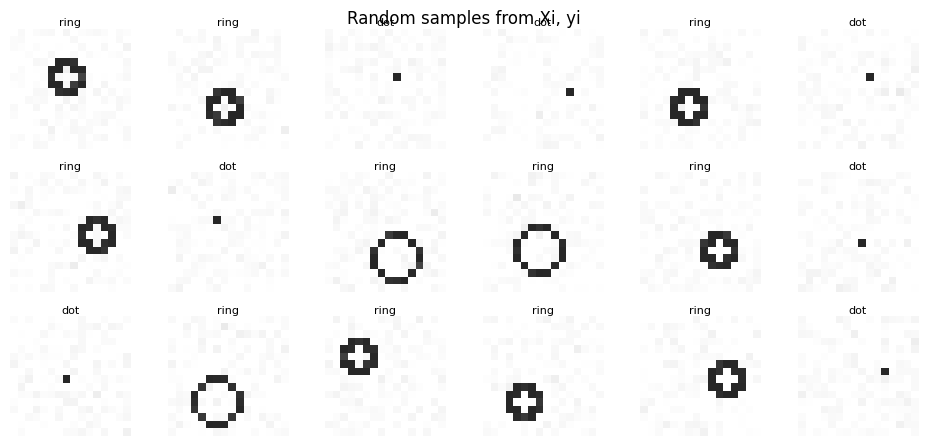

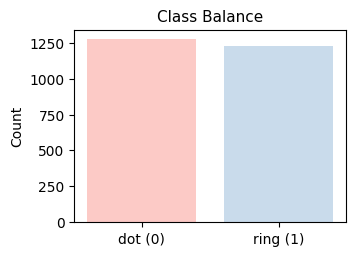

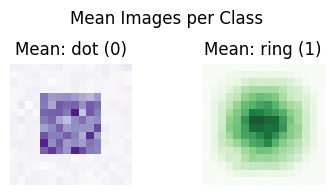

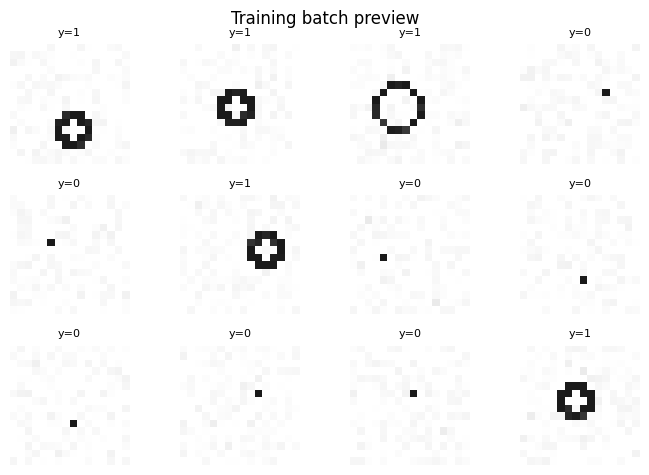

In [65]:
#@title Visualize the Synthetic image dataset (dot vs ring)
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: pastel color palette ---
PASTEL = plt.cm.Pastel1(np.linspace(0, 1, 8))
dot_color, ring_color = PASTEL[0], PASTEL[1]

def visualize_dataset(Xi, yi, nrows=3, ncols=6, size=16):
    idx = np.random.choice(len(Xi), nrows * ncols, replace=False)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.6, nrows*1.6))
    axes = axes.ravel()
    for ax, i in zip(axes, idx):
        ax.imshow(Xi[i,0], cmap="Greys", alpha=0.85)
        c = dot_color if yi[i] == 0 else ring_color
        ax.set_facecolor(c)
        ax.set_title("dot" if yi[i]==0 else "ring", fontsize=8, pad=2)
        ax.axis("off")
    fig.suptitle("Random samples from Xi, yi", fontsize=12, y=0.92)
    plt.tight_layout()
    plt.show()

def visualize_class_means(Xi, yi):
    mean_dot = Xi[yi==0].mean(axis=0)[0]
    mean_ring = Xi[yi==1].mean(axis=0)[0]
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(mean_dot, cmap="Purples", alpha=0.9)
    axes[0].set_title("Mean: dot (0)")
    axes[1].imshow(mean_ring, cmap="Greens", alpha=0.9)
    axes[1].set_title("Mean: ring (1)")
    for ax in axes: ax.axis("off")
    plt.suptitle("Mean Images per Class", y=0.95)
    plt.tight_layout()
    plt.show()

def visualize_class_balance(yi):
    counts = np.bincount(yi)
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(["dot (0)", "ring (1)"], counts, color=[dot_color, ring_color], alpha=0.7)
    plt.ylabel("Count")
    plt.title("Class Balance", fontsize=11)
    plt.show()

# --- Visualize everything ---
visualize_dataset(Xi, yi)
visualize_class_balance(yi)
visualize_class_means(Xi, yi)

# Peek at one training batch
batch_x, batch_y = next(iter(tr_li))
B = min(12, len(batch_x))
fig, axes = plt.subplots(3, 4, figsize=(7, 5))
axes = axes.ravel()
for i in range(B):
    ax = axes[i]
    ax.imshow(batch_x[i,0], cmap="Greys", alpha=0.9)
    c = dot_color if batch_y[i]==0 else ring_color
    ax.set_facecolor(c)
    ax.set_title(f"y={batch_y[i].item()}", fontsize=8)
    ax.axis("off")
for i in range(B, len(axes)): axes[i].axis("off")
plt.suptitle("Training batch preview", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


In [66]:

#@title Tiny CNN + training
class TinyCNN(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*4*4, 32), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, n_classes)
        )
    def forward(self, x): return self.net(x)

cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)
    if ep % 5 == 0:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test acc: {test_acc:.3f}")


[CNN] Epoch 05  loss 0.037/0.010  acc 1.000/1.000
[CNN] Epoch 10  loss 0.003/0.001  acc 1.000/1.000
[CNN] Epoch 15  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000


[CNN] Epoch 01  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000


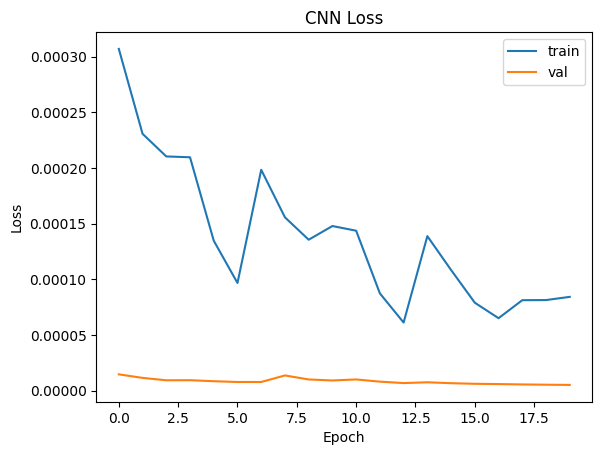

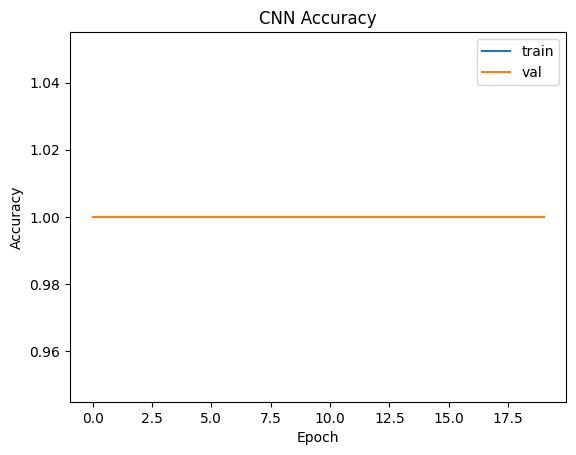

In [67]:
#@title Logging history and visualizing training:
epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)   # returns (loss, accuracy)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)               # returns (loss, accuracy)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test loss/acc: {test_loss:.3f} / {test_acc:.3f}")

# ---- Curves ----
plt.figure()
plt.plot(hist["tr_loss"], label="train")
plt.plot(hist["va_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train")
plt.plot(hist["va_acc"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy")
plt.legend()
plt.show()

The accuracy does not stay high with random shuffle.

There is overlap between the training and test sets.

Ignoring the added white noise, the dataset contains:

- $8 \times 8 = 64$ different dot configurations  
- $8 \times 8 \times 2 = 128$ different ring configurations  

The training split has $2500 \times 0.7 = 1750$ samples, assuming half rings and half dots.

The probability that a **testing dot image** does *not* appear in the training set is

$$
P = \left( 1 - \frac{1}{2} \cdot \frac{1}{64} \right)^{1750}
   \approx 1.1 \times 10^{-6}
$$

The probability that a **testing ring image** does *not* appear is

$$
P = \left( 1 - \frac{1}{2} \cdot \frac{1}{128} \right)^{1750}
   \approx 0.001
$$

Both probabilities are extremely small, so it is very likely that the testing set is almost completely covered by the training set.



## Exercise Stack G

1. **Splits & Seeds**: Change the train/val/test ratios to (0.6/0.2/0.2). Re-run and record the change in validation/test performance for the MLP. Try 3 different random seeds and average the results.
2. **Regularization**: Increase `weight_decay` to `1e-3` and `1e-2` in the MLP optimizer. What happens to the gap between train and validation accuracy?
3. **Dropout Sweep**: Change the dropout rate in the MLP to `0.0, 0.2, 0.5`. Plot validation accuracy vs. dropout.
4. **Learning Rate**: Try `lr=1e-2` and `lr=1e-4` in the MLP. Which learns faster? Which generalizes better?
5. **Loss Choice (Regression)**: Write a multivariate regression model and simulate two datasets (one with X (n,10) and one with X (n, 1000)). Add an L1 loss option for the regression model. Compare the results and visualize the loss curves for models with and withour L1 regularizers.
6. **Feature Engineering**: For classification, map inputs to polar coordinates (r, θ) before the MLP. Does it help on circles but hurt on moons? Why?
7. **Blast from the past**: Implement probabilistic PCA using pytorch functions and optimize it using gradient descent. Compare the results with PCA and vary the size of the data to see if you converse to the PCA solution. Why or why note?
8. **Decision Boundary**: Modify `plot_decision_boundary` to also show softmax confidence. Discuss regions of high uncertainty.


In [91]:
# 1 - alternative implementation with same behavior
def g1_func(dataset, split_ratio, model_cls, seed):
    gen = torch.Generator().manual_seed(seed)
    ds_train, ds_val, ds_test = random_split(dataset, split_ratio, generator=gen)
    bs = 64
    train_loader = DataLoader(ds_train, batch_size=bs, shuffle=True)
    val_loader   = DataLoader(ds_val,   batch_size=bs, shuffle=False)
    test_loader  = DataLoader(ds_test,  batch_size=bs, shuffle=False)
    model = model_cls().to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
    best_loss = float("inf")
    best_acc  = 0.0
    best_params = None

    logs = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    max_epochs = 300

    for ep in range(1, max_epochs + 1):
        tr_l, tr_a = train_epoch_cls(model, train_loader, criterion, optimizer)
        va_l, va_a = evaluate_cls(model, val_loader, criterion)

        logs["train_loss"].append(tr_l)
        logs["train_acc"].append(tr_a)
        logs["val_loss"].append(va_l)
        logs["val_acc"].append(va_a)
        scheduler.step()

        if va_l < best_loss:
            best_loss = va_l
            best_acc = va_a
            best_params = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}


    model.load_state_dict(best_params)


    te_loss, te_acc = evaluate_cls(model, test_loader, criterion)
    print(f"[Seed {seed}] Best val acc: {best_acc:.3f} | Test acc: {te_acc:.3f}")

    return best_acc, te_acc


In [88]:
split_cfg = [0.6, 0.2, 0.2]
seeds = [1, 2, 3]

acc_stats = {"val": [], "test": []}

for seed in seeds:
    val_acc, test_acc = g1_func(ds_cls, split_cfg, MLP, seed)
    acc_stats["val"].append(val_acc)
    acc_stats["test"].append(test_acc)

print(f"Average validation accuracy: {np.mean(acc_stats['val']):.3f}")
print(f"Average test accuracy: {np.mean(acc_stats['test']):.3f}")




[Seed 1] Best val acc: 0.946 | Test acc: 0.950
[Seed 2] Best val acc: 0.962 | Test acc: 0.942
[Seed 3] Best val acc: 0.946 | Test acc: 0.963
Average validation accuracy: 0.951
Average test accuracy: 0.951


In [114]:
#2
def g2_func_alt(dataset, model_cls, wd):
    gen = torch.Generator().manual_seed(0)
    ds_tr, ds_va, ds_te = random_split(dataset, [0.7, 0.15, 0.15], generator=gen)
    bs = 64
    tr_loader = DataLoader(ds_tr, batch_size=bs, shuffle=True)
    va_loader = DataLoader(ds_va, batch_size=bs, shuffle=False)
    te_loader = DataLoader(ds_te, batch_size=bs, shuffle=False)
    net = model_cls().to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=5e-3, weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

    best_val_loss = float("inf")
    best_state_dict = None
    logs = {
        "tr_loss": [], "tr_acc": [],
        "va_loss": [], "va_acc": [],
        "te_loss": [], "te_acc": [],
    }

    for ep in range(300):
        tr_l, tr_a = train_epoch_cls(net, tr_loader, loss_fn, optimizer)
        va_l, va_a = evaluate_cls(net, va_loader, loss_fn)
        te_l, te_a = evaluate_cls(net, te_loader, loss_fn)

        logs["tr_loss"].append(tr_l); logs["tr_acc"].append(tr_a)
        logs["va_loss"].append(va_l); logs["va_acc"].append(va_a)
        logs["te_loss"].append(te_l); logs["te_acc"].append(te_a)

        scheduler.step()
        if va_l < best_val_loss:
            best_val_loss = va_l
            best_state_dict = {k: v.detach().cpu().clone()
                               for k, v in net.state_dict().items()}
    net.load_state_dict(best_state_dict)
    plt.figure()
    plt.plot(logs["tr_acc"], label="train acc", color="blue")
    plt.plot(logs["va_acc"], label="val acc",   color="green")
    plt.plot(logs["te_acc"], label="test acc",  color="red")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"MLP accuracy (weight decay={wd})")
    plt.show()

    return




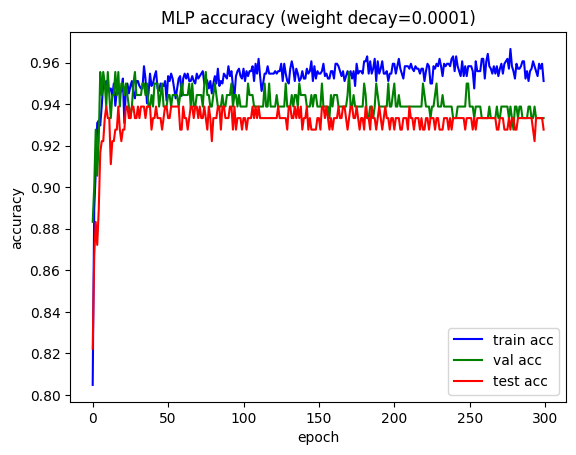

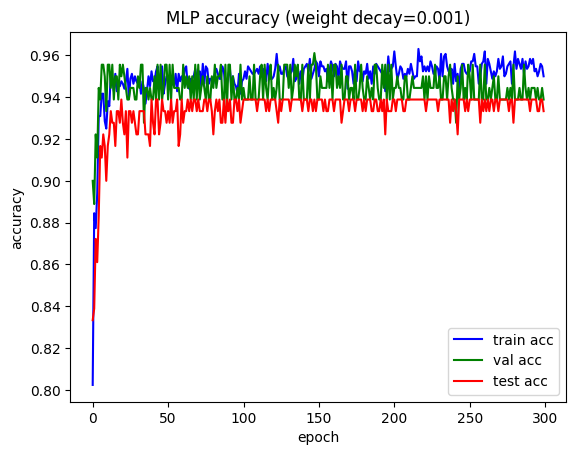

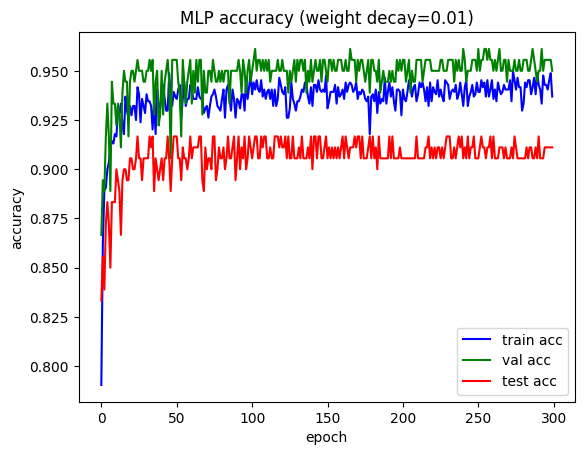

In [115]:
wd_list = (1e-4, 1e-3, 1e-2)
for wd in wd_list:
    g2_func_alt(ds_cls, MLP, wd)

Increasing the weight decay leads to a decrease in training accuracy and a simultaneous improvement in validation accuracy.

In [116]:
#3
def g3_func_alt(data, p):
    # split
    g = torch.Generator().manual_seed(0)
    tr, va, te = random_split(data, [0.7, 0.15, 0.15], generator=g)

    # loaders
    bs = 64
    tr_loader = DataLoader(tr, batch_size=bs, shuffle=True)
    va_loader = DataLoader(va, batch_size=bs, shuffle=False)
    model = MLP(p_dropout=p).to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    lr_sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)

    val_acc_history = []
    best_loss = float("inf")
    best_state = None

    for _ in range(300):
        tr_l, tr_a = train_epoch_cls(model, tr_loader, loss_fn, opt)
        va_l, va_a = evaluate_cls(model, va_loader, loss_fn)

        val_acc_history.append(va_a)
        lr_sched.step()

        if va_l < best_loss:
            best_loss = va_l
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    return val_acc_history


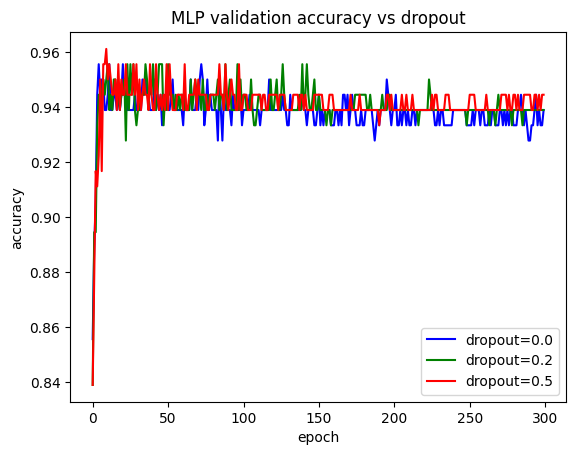

In [119]:
g3_dict = {}
for d in [0.0, 0.2, 0.5]:
    g3_val_acc = g3_func_alt(ds_cls, d)
    g3_dict[str(d)] = g3_val_acc

plt.figure()
plt.plot(g3_dict['0.0'], label="dropout=0.0",  color="blue")
plt.plot(g3_dict['0.2'], label="dropout=0.2",  color="green")
plt.plot(g3_dict['0.5'], label="dropout=0.5",  color="red")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("MLP validation accuracy vs dropout")
plt.show()


In [120]:
#4
def g4_func(data, lr):
    rng = torch.Generator().manual_seed(0)
    ds_train, ds_val, ds_test = random_split(
        data, [0.7, 0.15, 0.15], generator=rng
    )
    batch = 64
    train_ld = DataLoader(ds_train, batch_size=batch, shuffle=True)
    val_ld   = DataLoader(ds_val,   batch_size=batch, shuffle=False)
    net = MLP().to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=1e-4)
    lr_sched = torch.optim.lr_scheduler.StepLR(optim, step_size=100, gamma=0.5)
    record = {"acc_tr": [], "acc_va": [], "loss_tr": [], "loss_va": []}
    best_info = {"loss": float("inf"), "state": None}
    for _ in range(300):
        tr_loss, tr_acc = train_epoch_cls(net, train_ld, loss_fn, optim)
        va_loss, va_acc = evaluate_cls(net, val_ld, loss_fn)

        record["loss_tr"].append(tr_loss)
        record["acc_tr"].append(tr_acc)
        record["loss_va"].append(va_loss)
        record["acc_va"].append(va_acc)

        lr_sched.step()

        if va_loss < best_info["loss"]:
            best_info["loss"] = va_loss
            best_info["state"] = {
                k: v.detach().cpu().clone()
                for k, v in net.state_dict().items()
            }
    net.load_state_dict(best_info["state"])
    plt.figure()
    plt.plot(record["acc_tr"], label="train acc", color="green")
    plt.plot(record["acc_va"], label="val acc", color="orange")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.ylim(0.7, 1.0)
    plt.title(f"MLP accuracy (learning rate = {lr})")
    plt.show()

    return


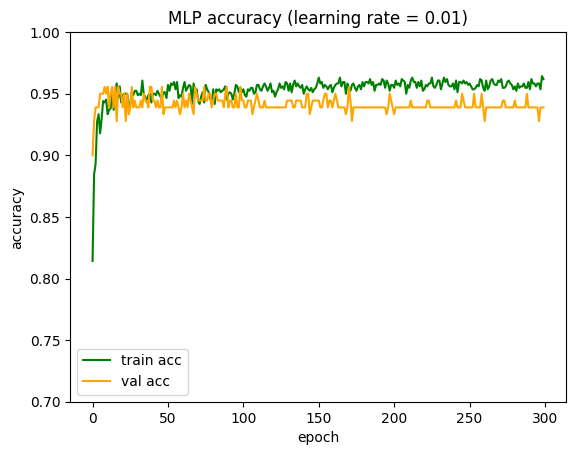

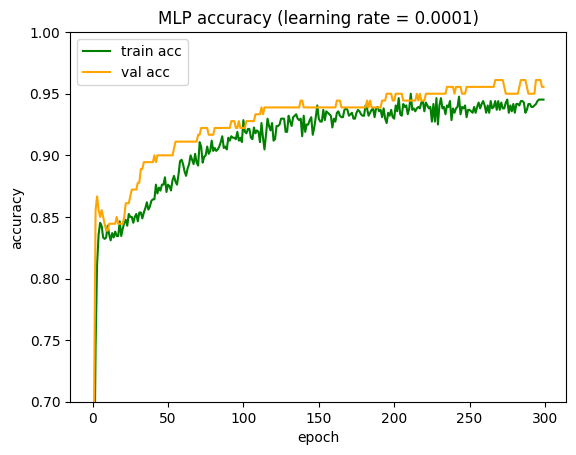

In [121]:
for r in [1e-2, 1e-4]:
    g4_func(ds_cls, r)

Training on 10-dimensional dataset
Training on 1000-dimensional dataset


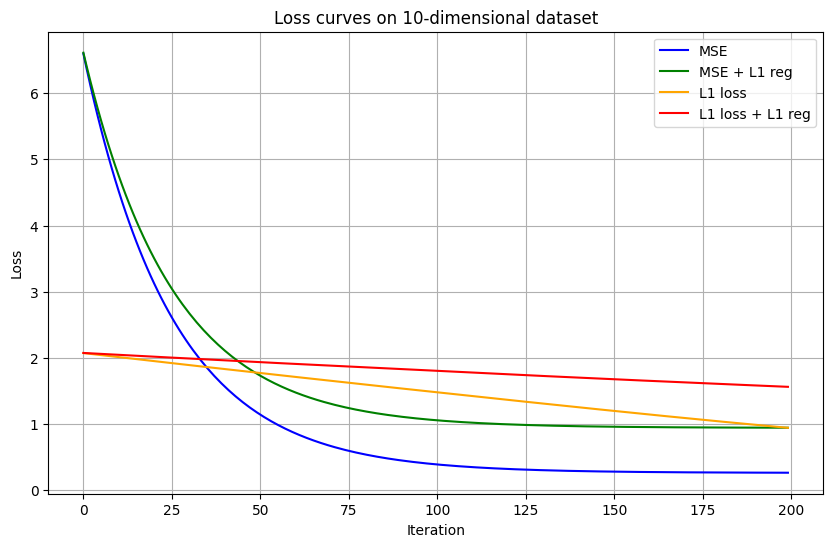

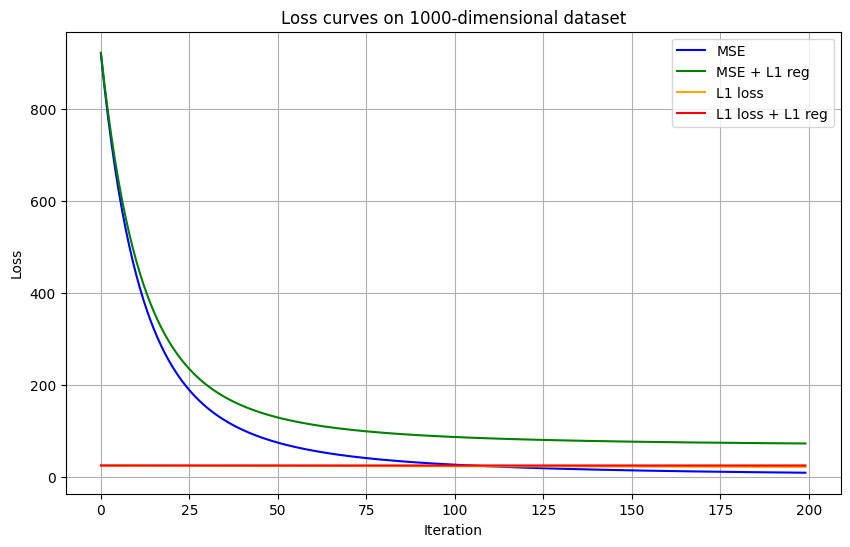

In [123]:
#5
import numpy as np
import matplotlib.pyplot as plt
def make_dataset(num_samples=1000, dim=10, noise_std=0.5):
    X = np.random.randn(num_samples, dim)
    w_true = np.random.randn(dim)
    y = X @ w_true + noise_std * np.random.randn(num_samples)
    return X, y, w_true
def mse_loss_fn(X, y, w):
    preds = X @ w
    return np.mean((preds - y) ** 2)

def l1_loss_fn(X, y, w):
    preds = X @ w
    return np.mean(np.abs(preds - y))

def objective_fn(X, y, w, loss_type="mse", l1_lambda=0.0):
    if loss_type == "mse":
        base_loss = mse_loss_fn(X, y, w)
    elif loss_type == "l1":
        base_loss = l1_loss_fn(X, y, w)
    else:
        raise ValueError("loss_type must be 'mse' or 'l1'")
    reg_term = l1_lambda * np.sum(np.abs(w))
    return base_loss + reg_term
def grad_objective(X, y, w, loss_type="mse", l1_lambda=0.0):
    n = y.shape[0]
    preds = X @ w

    if loss_type == "mse":
        grad = (2.0 / n) * (X.T @ (preds - y))
    elif loss_type == "l1":
        grad = (1.0 / n) * (X.T @ np.sign(preds - y))
    else:
        raise ValueError("loss_type must be 'mse' or 'l1'")
    grad += l1_lambda * np.sign(w)
    return grad
def run_gradient_descent(X, y, loss_type="mse", l1_lambda=0.0, lr=0.01, num_iters=200):
    d = X.shape[1]
    w = np.zeros(d, dtype=float)
    loss_history = []

    for step in range(num_iters):
        g = grad_objective(X, y, w, loss_type=loss_type, l1_lambda=l1_lambda)
        w = w - lr * g
        loss_history.append(objective_fn(X, y, w, loss_type=loss_type, l1_lambda=l1_lambda))

    return w, loss_history
datasets = {
    "10-dimensional":   make_dataset(num_samples=1000, dim=10),
    "1000-dimensional": make_dataset(num_samples=1000, dim=1000),
}

all_results = {}

for name, (X, y, w_true) in datasets.items():
    print(f"Training on {name} dataset")
    configs = [
        ("mse", 0.0,   "MSE"),
        ("mse", 0.1,   "MSE + L1 reg"),
        ("l1",  0.0,   "L1 loss"),
        ("l1",  0.1,   "L1 loss + L1 reg"),
    ]

    result_curves = {}

    for loss_type, lam, label in configs:
        w_hat, loss_curve = run_gradient_descent(
            X, y,
            loss_type=loss_type,
            l1_lambda=lam,
            lr=0.01,
            num_iters=200
        )
        result_curves[label] = loss_curve

    all_results[name] = result_curves
for name, curves in all_results.items():
    plt.figure(figsize=(10,6))

    color_map = {
        "MSE": "blue",
        "MSE + L1 reg": "green",
        "L1 loss": "orange",
        "L1 loss + L1 reg": "red"
    }

    for label, loss_curve in curves.items():
        plt.plot(loss_curve, label=label, color=color_map[label])

    plt.title(f"Loss curves on {name} dataset")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


In [124]:
#6
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def cartesian_to_polar(points):
    """
    points: array of shape (n_samples, 2) with columns [x, y]
    returns: array of shape (n_samples, 2) with columns [radius, angle]
    """
    x_coord = points[:, 0]
    y_coord = points[:, 1]
    radius = np.sqrt(x_coord**2 + y_coord**2)
    angle = np.arctan2(y_coord, x_coord)  # range [-pi, pi]
    return np.stack([radius, angle], axis=1)


def build_classification_data(kind="circles", n_samples=2000, noise=0.1, test_ratio=0.3):
    """
    kind: 'circles' or 'moons'
    returns standardized train/test splits
    """
    if kind == "circles":
        X, y = make_circles(n_samples=n_samples, factor=0.5, noise=noise)
    elif kind == "moons":
        X, y = make_moons(n_samples=n_samples, noise=noise)
    else:
        raise ValueError("kind must be 'circles' or 'moons'")

    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)

    return X_tr, X_te, y_tr, y_te


class SimpleMLP(nn.Module):
    def __init__(self, in_features=2, hidden_size=32):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
        )

    def forward(self, x):
        return self.layers(x)


def fit_mlp(X_train, y_train, X_test, y_test,
            input_dim=2, epochs=200, lr=1e-2, device="cpu"):
    """
    Train a small MLP on binary labels and return (model, test_accuracy)
    """
    model = SimpleMLP(in_features=input_dim).to(device)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_tr_t = torch.tensor(X_train, dtype=torch.float32, device=device)
    y_tr_t = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)
    X_te_t = torch.tensor(X_test, dtype=torch.float32, device=device)
    y_te_t = torch.tensor(y_test, dtype=torch.float32, device=device).view(-1, 1)

    for epoch in range(epochs):
        model.train()
        logits = model(X_tr_t)
        loss = loss_fn(logits, y_tr_t)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 50 == 0:
            model.eval()
            with torch.no_grad():
                probs = torch.sigmoid(model(X_te_t))
                preds = (probs > 0.5).float()
                acc = (preds.eq(y_te_t).float().mean()).item()
            print(f"Epoch {epoch+1:03d} | loss={loss.item():.4f} | test acc={acc:.4f}")
    model.eval()
    with torch.no_grad():
        probs = torch.sigmoid(model(X_te_t))
        preds = (probs > 0.5).float()
        final_acc = (preds.eq(y_te_t).float().mean()).item()

    return model, final_acc


def run_polar_experiment():
    torch.manual_seed(0)
    np.random.seed(0)

    for dataset_name in ["circles", "moons"]:
        print("=" * 60)
        print(f"Dataset: {dataset_name}")

        # 1) build original (x, y) dataset
        X_tr, X_te, y_tr, y_te = build_classification_data(kind=dataset_name)

        print(">>> Train on Cartesian coordinates (x, y)")
        _, acc_cart = fit_mlp(X_tr, y_tr, X_te, y_te, input_dim=2)

        # 2) transform to polar (r, theta)
        X_tr_p = cartesian_to_polar(X_tr)
        X_te_p = cartesian_to_polar(X_te)

        print(">>> Train on Polar coordinates (r, theta)")
        _, acc_pol = fit_mlp(X_tr_p, y_tr, X_te_p, y_te, input_dim=2)

        print(f"[{dataset_name}] Cartesian acc = {acc_cart:.4f}, Polar acc = {acc_pol:.4f}")


if __name__ == "__main__":
    run_polar_experiment()


Dataset: circles
>>> Train on Cartesian coordinates (x, y)
Epoch 050 | loss=0.0143 | test acc=0.9933
Epoch 100 | loss=0.0092 | test acc=0.9933
Epoch 150 | loss=0.0081 | test acc=0.9933
Epoch 200 | loss=0.0076 | test acc=0.9933
>>> Train on Polar coordinates (r, theta)
Epoch 050 | loss=0.0170 | test acc=0.9950
Epoch 100 | loss=0.0129 | test acc=0.9950
Epoch 150 | loss=0.0118 | test acc=0.9950
Epoch 200 | loss=0.0109 | test acc=0.9950
[circles] Cartesian acc = 0.9933, Polar acc = 0.9950
Dataset: moons
>>> Train on Cartesian coordinates (x, y)
Epoch 050 | loss=0.0642 | test acc=0.9783
Epoch 100 | loss=0.0055 | test acc=0.9983
Epoch 150 | loss=0.0032 | test acc=0.9983
Epoch 200 | loss=0.0022 | test acc=0.9983
>>> Train on Polar coordinates (r, theta)
Epoch 050 | loss=0.1454 | test acc=0.9450
Epoch 100 | loss=0.0381 | test acc=0.9867
Epoch 150 | loss=0.0257 | test acc=0.9917
Epoch 200 | loss=0.0181 | test acc=0.9967
[moons] Cartesian acc = 0.9983, Polar acc = 0.9967


n_samples = 100
Mean principal angle between PCA and PPCA subspaces: 0.03 degrees
Reconstruction MSE PCA :  0.0587
Reconstruction MSE PPCA:  0.0587


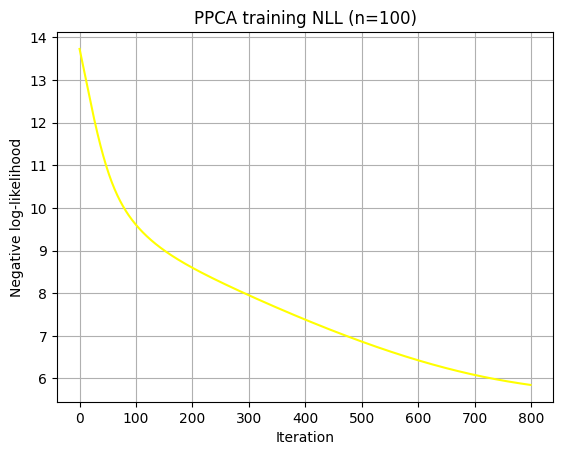

n_samples = 500
Mean principal angle between PCA and PPCA subspaces: 0.03 degrees
Reconstruction MSE PCA :  0.0559
Reconstruction MSE PPCA:  0.0559


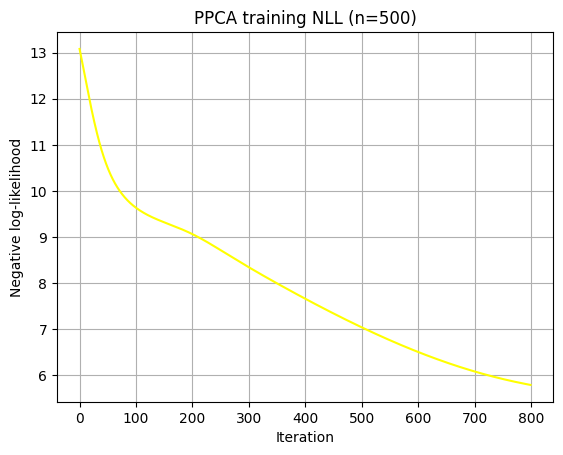

n_samples = 2000
Mean principal angle between PCA and PPCA subspaces: 0.04 degrees
Reconstruction MSE PCA :  0.0578
Reconstruction MSE PPCA:  0.0578


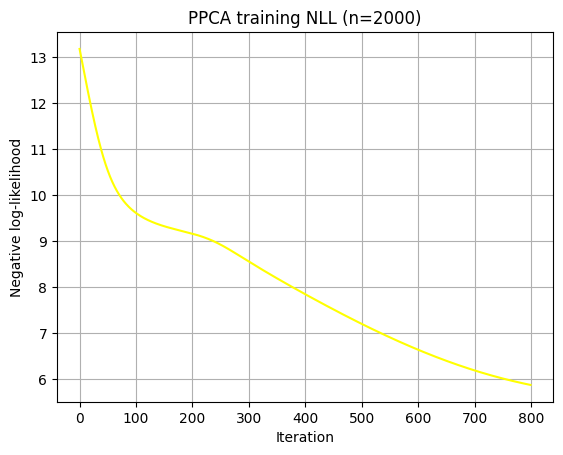

In [126]:
#7
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


def generate_ppca_data(n_samples=1000, d=5, k=2, sigma2_true=0.1, seed=0):
    """
    Sample data from the PPCA generative model:
        z ~ N(0, I_k)
        x | z ~ N(W z + mu, sigma^2 I_d)
    """
    rng = np.random.RandomState(seed)


    W_true = rng.normal(size=(d, k))
    mu_true = rng.normal(size=(d,))


    z_latent = rng.normal(size=(n_samples, k))
    noise = rng.normal(scale=np.sqrt(sigma2_true), size=(n_samples, d))

    X = z_latent @ W_true.T + mu_true + noise
    return X, W_true, mu_true, sigma2_true


def pca_numpy(X, k):
    """
    Standard PCA via eigen-decomposition of the covariance matrix.
    Returns the top-k eigenvectors (columns).
    """
    X_centered = X - X.mean(axis=0, keepdims=True)

    cov_mat = np.cov(X_centered, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov_mat)

    order = np.argsort(eigvals)[::-1]
    principal_vecs = eigvecs[:, order[:k]]
    return principal_vecs


class PPCA(nn.Module):
    def __init__(self, d, k):
        """
        Simple PPCA model with parameters:
            W (d x k), mu (d), log_sigma2 (scalar)
        """
        super().__init__()
        self.W = nn.Parameter(torch.randn(d, k) * 0.1)
        self.mu = nn.Parameter(torch.zeros(d))
        self.log_sigma2 = nn.Parameter(torch.tensor(0.0))

    def covariance(self):
        """
        C = W W^T + sigma^2 I
        """
        d = self.W.shape[0]
        sigma2 = torch.exp(self.log_sigma2)
        I = torch.eye(d, device=self.W.device, dtype=self.W.dtype)
        C = self.W @ self.W.T + sigma2 * I
        return C

    def neg_log_likelihood(self, X):
        """
        Negative log-likelihood of the PPCA model for a batch X (N x d).
        Uses Cholesky decomposition for log-det and quadratic form.
        """
        N, d = X.shape
        C = self.covariance()

        X_centered = X - self.mu
        L = torch.linalg.cholesky(C)
        logdet_C = 2.0 * torch.log(torch.diagonal(L)).sum()
        Y = X_centered.T
        v, _ = torch.triangular_solve(Y, L, upper=False)
        quad_terms = (v ** 2).sum(dim=0)

        nll = 0.5 * (logdet_C + quad_terms.mean() + d * np.log(2.0 * np.pi))
        return nll


def fit_ppca(X_np, k=2, lr=1e-2, iters=500, verbose=False, device="cpu"):
    """
    Fit PPCA by minimizing NLL over X using Adam.
    Returns (trained_model, list_of_losses).
    """
    X = torch.tensor(X_np, dtype=torch.float32, device=device)
    N, d = X.shape

    model = PPCA(d, k).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    loss_history = []
    for t in range(iters):
        optimizer.zero_grad()
        nll = model.neg_log_likelihood(X)
        nll.backward()
        optimizer.step()

        loss_history.append(nll.item())

        if verbose and (t + 1) % 100 == 0:
            print(f"iter {t+1:04d}, nll = {nll.item():.4f}")

    return model, loss_history


def orthonormalize(W):
    """
    Orthonormalize columns of W via QR decomposition.
    """
    Q, _ = np.linalg.qr(W)
    return Q


def subspace_angle(U, V):
    """
    Compute the mean principal angle (in degrees) between
    the subspaces spanned by columns of U and V.
    """
    M = U.T @ V
    s = np.linalg.svd(M, compute_uv=False)
    s = np.clip(s, -1.0, 1.0)
    angles = np.arccos(s) * 180.0 / np.pi
    return angles.mean()


def run_experiment():
    torch.manual_seed(0)
    np.random.seed(0)

    d = 5
    k = 2
    sample_sizes = [100, 500, 2000]

    for n in sample_sizes:
        print("=" * 60)
        print(f"n_samples = {n}")
        X, W_true, mu_true, sigma2_true = generate_ppca_data(
            n_samples=n, d=d, k=k, sigma2_true=0.1, seed=0
        )
        U_pca = pca_numpy(X, k)
        U_pca_orth = orthonormalize(U_pca)
        model, losses = fit_ppca(X, k=k, lr=5e-3, iters=800, verbose=False)
        W_hat = model.W.detach().cpu().numpy()
        U_ppca_orth = orthonormalize(W_hat)
        angle_deg = subspace_angle(U_pca_orth, U_ppca_orth)
        print(f"Mean principal angle between PCA and PPCA subspaces: {angle_deg:.2f} degrees")
        X_centered = X - X.mean(axis=0, keepdims=True)

        Z_pca = X_centered @ U_pca_orth
        X_recon_pca = Z_pca @ U_pca_orth.T + X.mean(axis=0, keepdims=True)

        Z_ppca = X_centered @ U_ppca_orth
        X_recon_ppca = Z_ppca @ U_ppca_orth.T + X.mean(axis=0, keepdims=True)

        rec_pca = np.mean((X - X_recon_pca) ** 2)
        rec_ppca = np.mean((X - X_recon_ppca) ** 2)

        print(f"Reconstruction MSE PCA :  {rec_pca:.4f}")
        print(f"Reconstruction MSE PPCA:  {rec_ppca:.4f}")
        plt.figure()
        plt.plot(losses, color="Yellow")
        plt.xlabel("Iteration")
        plt.ylabel("Negative log-likelihood")
        plt.title(f"PPCA training NLL (n={n})")
        plt.grid(True)
        plt.show()


if __name__ == "__main__":
    run_experiment()


In [157]:
#8
import torch.nn.functional as F
import torch

@torch.no_grad()
def plot_soft_boundary(model, X, y, title="Decision boundary and Confidence"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE))
    if logits.ndim == 2 and logits.shape[1] == 1:
        probs = torch.sigmoid(logits).view(-1).cpu().numpy()
    else:
        probs = F.softmax(logits, dim=1)[:, 1].cpu().numpy()

    Z = probs.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    contour = plt.contourf(
        xx, yy, Z,
        levels=60,
        cmap="coolwarm",
        alpha=0.6,
        vmin=0.0, vmax=1.0
    )
    cbar = plt.colorbar(contour)
    cbar.set_label("Predicted probability (class 1)")
    X0 = X[y == 0]
    X1 = X[y == 1]
    plt.scatter(X0[:, 0], X0[:, 1], c="green",  s=10, edgecolor="k", linewidth=0.2, label="class 0")
    plt.scatter(X1[:, 0], X1[:, 1], c="purple", s=10, edgecolor="k", linewidth=0.2, label="class 1")

    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.tight_layout()
    plt.show()


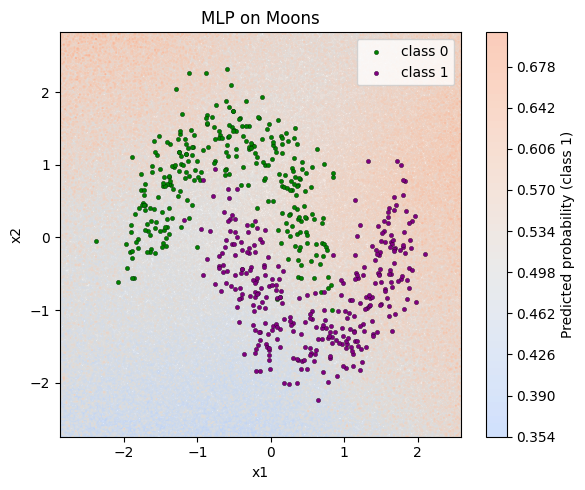

In [158]:
plot_soft_boundary(mlp, X_test, y_test, title="MLP on Moons")


## Mini Project 2 Details


You can get more information [here](https://drive.google.com/drive/folders/1Ckwfj0L788Tg3E6WAazXBB1W2ATta_w9).


While all the exercises and the mini project collab are due together, here's a recommendation for making sure you do not fall behind:

🧠 Mini Project — Recommended Week of Nov 3rd

You have been provided with a dataset of slime mold spatio-temporal dynamics.
Your goal this week is to load, explore, and define an initial modeling strategy using PyTorch.

🧩 Tasks



1.   Load the dataset


*   Identify and use the right Python package to load the data (hint: .zarr format).
*   Write a simple data loader that converts it into a PyTorch tensor.


2.   Visualize the data


*   Plot a few time frames.
*   Describe what you see — what kind of motion or aggregation is happening?



3.   Inspect the data tensor


*   What is the shape of your data?
*   What do each of the dimensions represent?


4.   Define the learning setup

*   Is this a supervised or unsupervised problem?
*   What is your strategy for modeling this data?
(There is no unique answer — justify your choice.)


5.   Specify the optimization target

*   What loss function will you optimize?
*   How will you split your data into training and testing sets?


6.   First modeling attempt

*   Treat this as a nonlinear regression problem.
*   Write a small model class, train it, and visualize the loss landscape.
*   Try one or two variants (e.g. different architectures or window sizes).

📘 Deliverables

Submit a short notebook including:

* Code to load and visualize the data.

* A short discussion of data shape, modeling strategy, and loss.

* Example plots and initial training results.

## 5) TL;DR for your Toolkit!

- **Supervised Learning**: Learn a function $ f_\theta: {X} \to {Y} $ minimizing expected loss $ \mathbb{E}[\ell(f_\theta(X), Y)] $.
- **Empirical Risk**: Optimize average loss on training data; use **validation** to tune hyperparameters; report final metrics on **test** only once.
- **Common losses**: MSE for regression; Cross-Entropy for classification.
- **Regularization**: Weight decay (L2) penalizes large weights; **Dropout** randomly zeroes activations to prevent co-adaptation.
- **Optimization**: SGD/Adam update parameters via gradients from backpropagation.
- **Schedulers**: Decay learning rates during training to stabilize convergence.
- **Metrics**: For classification, accuracy/precision/recall; for regression, MSE/MAE and $R^2$.
- **Reproducibility**: Fix seeds; log versions; control randomness.
